### Installing CatBoost Library

We will install the CatBoost library which provides the CatBoostRegressor, a powerful algorithm for regression tasks.

In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


# Importing Necessary Libraries

In this section, we import all the libraries necessary for our data analysis and machine learning tasks. This includes libraries for data manipulation (pandas, numpy), machine learning algorithms (CatBoost, scikit-learn), and visualization (matplotlib).

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)


# 1: Project Overview
The mission of this project is to construct a sophisticated data science workflow aimed at precisely predicting the locational coordinates of particle interactions within a Resistive Silicon Detector (RSD) – a pivotal instrument in the realm of particle physics. The RSD features a two-dimensional interface equipped with twelve intricately designed metallic pads, each responsible for signal detection when particles traverse the detector's plane. Every particle event is marked by a distinct signal profile captured by these pads. The central challenge and primary objective of our endeavor is to create a robust predictive model that accurately pinpoints the (x, y) coordinates where each particle event occurs on the RSD, utilizing the detailed signal data procured from the detector pads. This model aspires to enhance the precision of event localization within the RSD, thereby contributing valuable insights to particle physics research.

# 2: Data Loading and Initial Setup

In this section, we configure the environment to display a sufficient number of rows for data examination. We then mount the Google Drive to access the project dataset and load it into a pandas DataFrame for subsequent analysis.

In [3]:
# Setting the maximum number of rows pandas will display to 100 for better dataframe visibility
pd.set_option('display.max_rows', 100)

# Importing the Google Colab drive module and mountin the user's Google Drive to the Colab environment
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the dataset stored on Google Drive
pdata_path = '/content/drive/MyDrive/DSL_2024/development.csv'

# Load the dataset from the CSV file into a pandas DataFrame
df = pd.read_csv(pdata_path)

# Making a full copy of the original dataframe to preserve the raw data
df_full = df.copy()

# Display the first five rows of the dataframe to verify it loaded correctly
df.head(5)

Mounted at /content/drive


,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,200.0,200.0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,4.538778,...,607.109118,-36.282996,583.899899,72.373094,0.374498,614.916861,-39.848523,591.852768,72.331028,0.405595
1,200.0,200.0,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,3.720435,...,630.348007,-39.715988,580.042799,71.029155,0.403258,624.950701,-41.266681,586.569646,71.089058,0.405890
2,200.0,200.0,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,3.490490,...,613.880342,-40.679678,580.407491,71.892264,0.568777,596.437125,-42.712286,574.091695,71.943934,0.498019
3,200.0,200.0,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,6.786200,...,600.714957,-43.206601,579.882635,72.357388,0.255483,591.763739,-50.681940,584.099483,72.333282,0.336454
4,200.0,200.0,4.448146,-4.848743,3.997002,196.667482,1.101113,3.250262,-5.783587,2.449456,...,609.723785,-43.570892,590.156125,71.249130,0.413855,606.917023,-49.923819,584.316142,71.242904,0.293824


In [4]:
# Display the data for the fourth event (index 4) in the DataFrame to inspect the information for a single particle event
df.iloc[4]

x              200.000000
y              200.000000
pmax[0]          4.448146
negpmax[0]      -4.848743
area[0]          3.997002
tmax[0]        196.667482
rms[0]           1.101113
pmax[1]          3.250262
negpmax[1]      -5.783587
area[1]          2.449456
tmax[1]        159.800000
rms[1]           0.759515
pmax[2]          4.736023
negpmax[2]      -5.137939
area[2]          4.211047
tmax[2]         71.200000
rms[2]           1.237268
pmax[3]          5.123048
negpmax[3]      -4.447104
area[3]          4.377708
tmax[3]         71.357237
rms[3]           1.417505
pmax[4]          3.026709
negpmax[4]      -6.137964
area[4]          1.423594
tmax[4]          2.600000
rms[4]           1.474896
pmax[5]         12.557806
negpmax[5]      -4.582629
area[5]          9.222847
tmax[5]         71.160201
rms[5]           1.814520
pmax[6]          6.115046
negpmax[6]      -4.172168
area[6]          4.218594
tmax[6]         70.759682
rms[6]           1.794109
pmax[7]          4.456955
negpmax[7]  

In [5]:
# Display a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385500 entries, 0 to 385499
Data columns (total 92 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   x            385500 non-null  float64
 1   y            385500 non-null  float64
 2   pmax[0]      385500 non-null  float64
 3   negpmax[0]   385500 non-null  float64
 4   area[0]      385500 non-null  float64
 5   tmax[0]      385500 non-null  float64
 6   rms[0]       385500 non-null  float64
 7   pmax[1]      385500 non-null  float64
 8   negpmax[1]   385500 non-null  float64
 9   area[1]      385500 non-null  float64
 10  tmax[1]      385500 non-null  float64
 11  rms[1]       385500 non-null  float64
 12  pmax[2]      385500 non-null  float64
 13  negpmax[2]   385500 non-null  float64
 14  area[2]      385500 non-null  float64
 15  tmax[2]      385500 non-null  float64
 16  rms[2]       385500 non-null  float64
 17  pmax[3]      385500 non-null  float64
 18  negpmax[3]   385500 non-

In [6]:
# Check for missing values in each column of the DataFrame
# 'isna()' identifies the NaN values, and 'any(axis=0)' checks for at least one NaN in each column
df.isna().any(axis=0)

x              False
y              False
pmax[0]        False
negpmax[0]     False
area[0]        False
tmax[0]        False
rms[0]         False
pmax[1]        False
negpmax[1]     False
area[1]        False
tmax[1]        False
rms[1]         False
pmax[2]        False
negpmax[2]     False
area[2]        False
tmax[2]        False
rms[2]         False
pmax[3]        False
negpmax[3]     False
area[3]        False
tmax[3]        False
rms[3]         False
pmax[4]        False
negpmax[4]     False
area[4]        False
tmax[4]        False
rms[4]         False
pmax[5]        False
negpmax[5]     False
area[5]        False
tmax[5]        False
rms[5]         False
pmax[6]        False
negpmax[6]     False
area[6]        False
tmax[6]        False
rms[6]         False
pmax[7]        False
negpmax[7]     False
area[7]        False
tmax[7]        False
rms[7]         False
pmax[8]        False
negpmax[8]     False
area[8]        False
tmax[8]        False
rms[8]         False
pmax[9]      

All features in the dataset are complete without any missing entries. Additionally, every feature is characterized by float64 data type. This suggests minimal or potentially no requirement for extensive data preparation steps.

# Assessing for Duplicate Entries in the Dataset

In this section, we will investigate the presence of any duplicate records in the dataset. Identifying and handling duplicates is crucial for maintaining the integrity of our analysis and ensuring the accuracy of our model

In [7]:
# Identify any duplicate rows in the DataFrame
duplicate_entries = df.duplicated()

# Conditional check to determine if duplicates exist
if duplicate_entries.any():
    print('Duplicates detected in the dataset, action required for resolution.')
else:
    print('No duplicates found in the dataset, ready to proceed.')

No duplicates found in the dataset, ready to proceed.


In [8]:
# Determine the number of unique values in the 'x' and 'y' columns
unique_x_positions = df['x'].unique().shape
unique_y_positions = df['y'].unique().shape

# Print the number of unique x and y positions
print("Number of unique x positions:", unique_x_positions)
print("Number of unique y positions:", unique_y_positions)

Number of unique x positions: (81,)
Number of unique y positions: (81,)


The dataset contains 81 possible positions for the events in both x and y dimensions

 # 3 :Advanced Feature Analysis: Statistical and Visual Exploration for Noise Reduction in Particle Event Data

 In this approach to feature analysis, we delve deeper into understanding and managing noisy data. By employing statistical analysis, we first assess the summary statistics of the pmax values across the 18 sensor pads, pinpointing any unusual variance or extremes that might indicate noise. Following this, we utilize advanced visualization techniques, specifically box plots, to offer a clearer view of the data's distribution, emphasizing outliers and data spread. Lastly, we conduct a correlation analysis with the target variables (x, y coordinates), which aids in discerning the relevance of each pad's signals to our predictive task. This comprehensive strategy not only identifies potential sources of noise but also guides us in refining our dataset for subsequent predictive modeling, ensuring accuracy and reliability in our particle event localization endeavor.

Summary Statistics for pmax values:
              pmax[0]        pmax[1]        pmax[2]        pmax[3]  \
count  385500.000000  385500.000000  385500.000000  385500.000000   
mean        4.866423      16.510543       8.784017      26.457888   
std         1.481220      16.781018       7.692692      25.397517   
min         1.394440       2.028134       1.799435       2.034311   
25%         4.123941       5.619728       4.681271       9.327397   
50%         4.668321      10.068513       5.714713      15.071468   
75%         5.265888      19.031319       9.796498      36.166834   
max        20.515415     106.649066      68.837366     136.658588   

             pmax[4]        pmax[5]        pmax[6]        pmax[7]  \
count  385500.000000  385500.000000  385500.000000  385500.000000   
mean       14.947826      39.333002      14.907669       4.849883   
std        13.394484      27.899214      16.613431       1.487651   
min         1.940271       2.476239       1.883002       1.591489

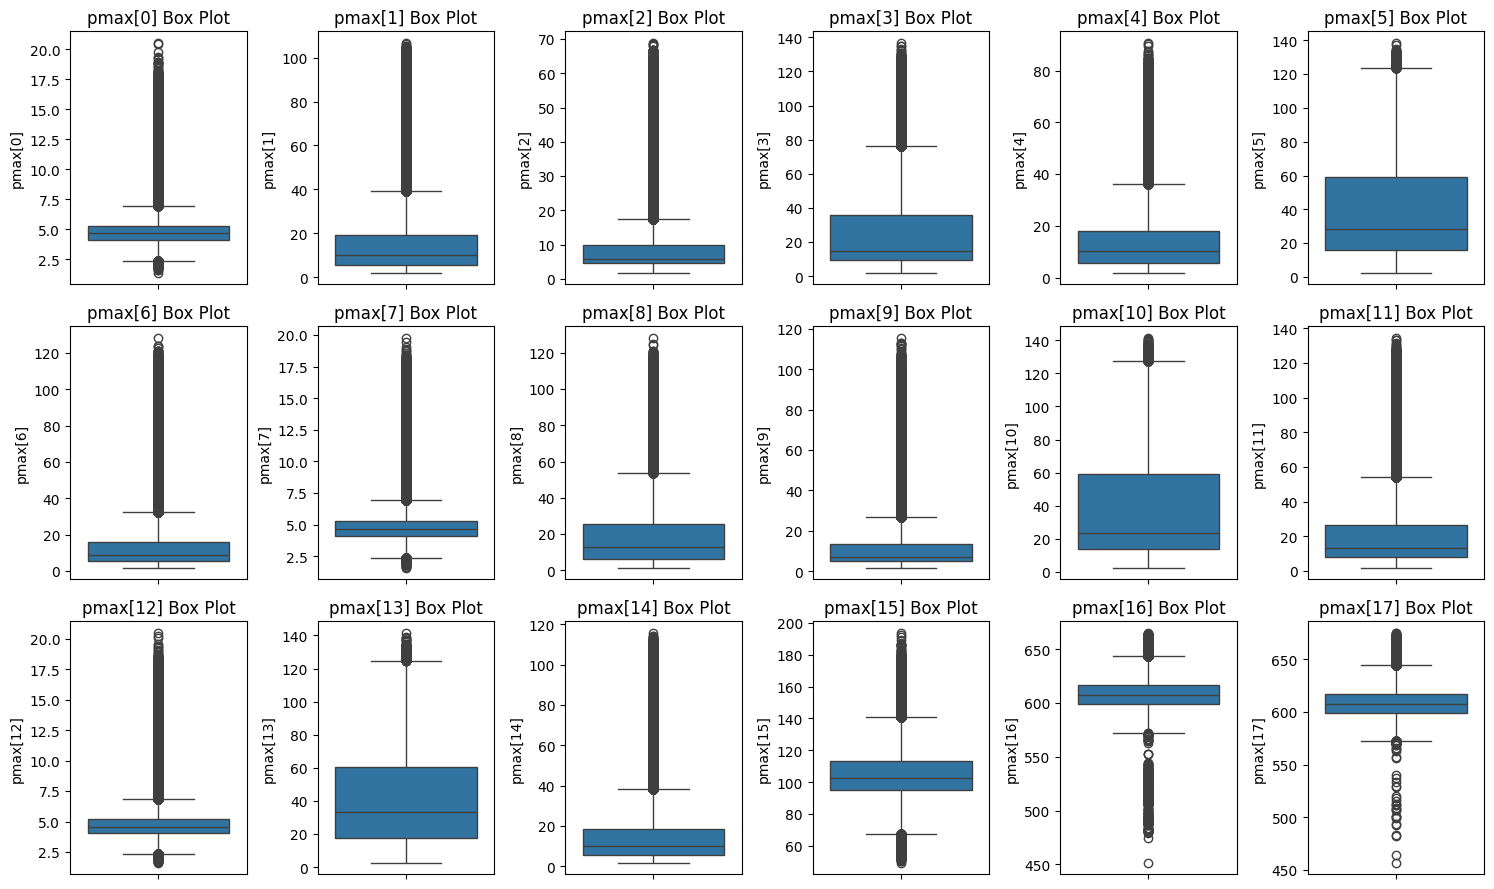

Correlation with target variables (x, y):
                  x         y
pmax[0]  -0.003647  0.013365
pmax[1]   0.726619  0.307673
pmax[2]   0.477606  0.516068
pmax[3]   0.416501  0.703649
pmax[4]  -0.247361  0.760833
pmax[5]  -0.493251  0.548665
pmax[6]  -0.569413  0.490734
pmax[7]  -0.006498  0.015404
pmax[8]  -0.779363 -0.086546
pmax[9]  -0.545835 -0.490673
pmax[10] -0.447803 -0.658605
pmax[11]  0.361139 -0.714181
pmax[12]  0.001926  0.001774
pmax[13]  0.661260 -0.126507
pmax[14]  0.679072 -0.366370
pmax[15]  0.010714 -0.330274
pmax[16]  0.012064  0.003557
pmax[17]  0.014025 -0.002008
x         1.000000  0.006282
y         0.006282  1.000000


In [9]:
import seaborn as sns

# Statistical Analysis of pmax Values
pmax_stats = df[[f'pmax[{i}]' for i in range(18)]].describe()
print("Summary Statistics for pmax values:\n", pmax_stats)

# Advanced Visualization with Box Plots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(15, 9))
for i in range(18):
    row_index, col_index = divmod(i, 6)
    sns.boxplot(y=df[f'pmax[{i}]'], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'pmax[{i}] Box Plot')
plt.tight_layout()
plt.show()

# Correlation Analysis with Target Variables
correlation_with_target = df[[f'pmax[{i}]' for i in range(18)] + ['x', 'y']].corr()
print("Correlation with target variables (x, y):\n", correlation_with_target[['x', 'y']])


In this data analysis step, we have identified certain pads that do not significantly contribute to the prediction of particle event locations. Pads [0, 7, 12, 15, 16, 17] exhibit low correlation with our target variables, 'x' and 'y', indicating a weak linear relationship. Furthermore, the pmax values for these pads, excluding pad 15, are uniformly distributed, suggesting that these features do not carry distinctive information about the particle events. Consequently, we have decided to exclude these pads from our dataset to streamline our feature set and enhance the predictive accuracy of our model. This careful selection of features is essential for building a robust and efficient predictive model.

 # Refinement and Feature Consolidation for Optimized Signal Analysis

In this phase, we continue the data preparation process with a strategic emphasis on signal refinement. By selectively discarding less informative features, we concentrate on the salient 'pmax' and 'negpmax' values, particularly from pad 15 which has demonstrated unique predictive capabilities. Recognizing pad 15's distinctiveness, we engineer new features that encapsulate its relative signal strength compared to its neighboring pads. This not only cleanses our dataset of noise but also magnifies the potential insights from pad 15. The resulting refined dataset now presents a streamlined and potent basis for robust model development, laying the groundwork for enhanced predictive precision.

In [10]:
# Define the list of noisy pads
noisy_pads = [0, 7, 12, 16, 17]

# Remove less informative features and retain the critical 'pmax' and 'negpmax' for pad 15
for i in set(range(18)) - set(noisy_pads) - {15}:
    df.drop([f'area[{i}]', f'tmax[{i}]', f'rms[{i}]'], axis=1, inplace=True)

# Considering the special role of pad 15, create additional features that may capture its unique contribution
df['pmax15_diff_neighbors'] = df['pmax[15]'] - df[[f'pmax[{i}]' for i in [14, 11, 9]]].mean(axis=1)
df['pmax15_ratio_neighbors'] = df['pmax[15]'] / df[[f'pmax[{i}]' for i in [14, 11, 9]]].mean(axis=1)

# Drop features from noisy pads
features_to_drop = [f'{measure}[{pad}]' for pad in noisy_pads for measure in ['pmax', 'negpmax']]
df_refined = df.drop(features_to_drop, axis=1)

# Display the refined DataFrame
df_refined.head()


,x,y,area[0],tmax[0],rms[0],pmax[1],negpmax[1],pmax[2],negpmax[2],pmax[3],...,tmax[15],rms[15],area[16],tmax[16],rms[16],area[17],tmax[17],rms[17],pmax15_diff_neighbors,pmax15_ratio_neighbors
0,200.0,200.0,2.847932,0.600000,2.007042,5.409161,-17.721210,6.084506,-19.892543,3.811328,...,72.276594,1.196239,583.899899,72.373094,0.374498,591.852768,72.331028,0.405595,110.178203,3.791404
1,200.0,200.0,5.792778,79.765174,1.564535,4.414289,-4.736827,4.507257,-3.787175,3.940369,...,71.065221,1.534433,580.042799,71.029155,0.403258,586.569646,71.089058,0.405890,108.212636,3.656806
2,200.0,200.0,2.356390,74.600000,1.404622,4.567191,-5.985437,5.384155,-3.948853,4.903412,...,71.869933,1.010175,580.407491,71.892264,0.568777,574.091695,71.943934,0.498019,117.174403,4.226147
3,200.0,200.0,2.189005,43.000000,1.512162,5.019058,-4.229949,4.165598,-5.576041,3.791672,...,72.262946,1.283015,579.882635,72.357388,0.255483,584.099483,72.333282,0.336454,116.207814,4.259497
4,200.0,200.0,3.997002,196.667482,1.101113,3.250262,-5.783587,4.736023,-5.137939,5.123048,...,71.212440,1.480449,590.156125,71.249130,0.413855,584.316142,71.242904,0.293824,95.622726,3.303252


In this critical stage of data optimization, we have executed a focused pruning of our dataset to shed extraneous signal features that are peripheral to our main objective. By surgically removing the 'area', 'tmax', and 'rms' attributes from all pads, we distill our feature set down to the essentials: the peak magnitudes of both positive and negative signals, denoted as pmax and negpmax. This distillation process is followed by a judicious exclusion of data from pads identified as 'noisy', specifically [0, 7, 12, 16, 17]. This strategic exclusion is pivotal, as it expunges elements that could introduce bias or distortion into our analysis. The culmination of this cleansing is a dataset honed for precision, setting a strong foundation for the creation of a predictive model with enhanced accuracy in locating particle interactions—a testament to the meticulous preparation that underpins robust analytical endeavors.

In [11]:
# Define the list of noisy pads we aim to exclude
noisy_pads = [0, 7, 12, 16, 17]

# List of signal attributes to consider for exclusion
signal_attributes = ['pmax', 'negpmax', 'tmax', 'area', 'rms']

# Generate the feature names to remove, based on noisy pads and signal attributes
features_to_remove = [f"{attribute}[{pad}]" for pad in noisy_pads for attribute in signal_attributes]

# Drop the noisy features from the full dataset to cleanse it
df_full_cleaned = df_full.drop(columns=features_to_remove)

# Confirm the dataset now excludes features from noisy pads while retaining others
print("Features from noisy pads have been removed. Remaining features:")
print(df_full_cleaned.columns)


Features from noisy pads have been removed. Remaining features:
Index(['x', 'y', 'pmax[1]', 'negpmax[1]', 'area[1]', 'tmax[1]', 'rms[1]',
       'pmax[2]', 'negpmax[2]', 'area[2]', 'tmax[2]', 'rms[2]', 'pmax[3]',
       'negpmax[3]', 'area[3]', 'tmax[3]', 'rms[3]', 'pmax[4]', 'negpmax[4]',
       'area[4]', 'tmax[4]', 'rms[4]', 'pmax[5]', 'negpmax[5]', 'area[5]',
       'tmax[5]', 'rms[5]', 'pmax[6]', 'negpmax[6]', 'area[6]', 'tmax[6]',
       'rms[6]', 'pmax[8]', 'negpmax[8]', 'area[8]', 'tmax[8]', 'rms[8]',
       'pmax[9]', 'negpmax[9]', 'area[9]', 'tmax[9]', 'rms[9]', 'pmax[10]',
       'negpmax[10]', 'area[10]', 'tmax[10]', 'rms[10]', 'pmax[11]',
       'negpmax[11]', 'area[11]', 'tmax[11]', 'rms[11]', 'pmax[13]',
       'negpmax[13]', 'area[13]', 'tmax[13]', 'rms[13]', 'pmax[14]',
       'negpmax[14]', 'area[14]', 'tmax[14]', 'rms[14]', 'pmax[15]',
       'negpmax[15]', 'area[15]', 'tmax[15]', 'rms[15]'],
      dtype='object')


we continue to sculpt our dataset for optimal model training, we've pinpointed specific pads whose signal features contribute more to noise than to the signal. These are pads numbered [0, 7, 12, 16, 17]. For each of these, a spectrum of attributes—peak magnitudes (both positive and negative), the time of maximum signal (tmax), the area under the signal curve, and the root mean square (rms)—are meticulously excised from our dataset. This action is not merely subtractive; it's a calculated enhancement, ensuring that the remaining dataset is a cleaner, more accurate representation of the meaningful patterns we seek to model. The resultant dataframe, now purified of these distractive elements, is poised to be the bedrock upon which a more reliable and discriminating model can be built.

# Optimizing Sensor Pad Localization with Efficient Data Analysis

Our methodological refinement for pad localization marries efficiency with precision. By utilizing the nlargest function, we rapidly pinpoint the prime coordinates associated with the highest signal peaks. The aggregation of these points offers us an accurate estimation of each pad's central location, essential for the sophisticated signal analysis that informs our predictive model.

In [12]:
# Define the list of real pads if not already done
real_pads = [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14]

# Initialize a dictionary to store the estimated central locations
pads_location = {}

# Calculate the estimated central location for each pad
for pad in real_pads:
    top_pmax_coordinates = df.nlargest(50, f'pmax[{pad}]')[['x', 'y']]
    pads_location[pad] = top_pmax_coordinates.mean().values

# Print the pads_location dictionary to see the estimated x, y coordinates for each pad
for pad, location in pads_location.items():
    print(f"Pad {pad}: X = {location[0]:.2f}, Y = {location[1]:.2f}")



Pad 1: X = 599.70, Y = 486.80
Pad 2: X = 595.90, Y = 597.00
Pad 3: X = 464.80, Y = 588.60
Pad 4: X = 341.90, Y = 599.50
Pad 5: X = 308.90, Y = 492.30
Pad 6: X = 201.10, Y = 589.20
Pad 8: X = 200.60, Y = 388.30
Pad 9: X = 203.60, Y = 201.60
Pad 10: X = 318.60, Y = 282.60
Pad 11: X = 466.80, Y = 210.80
Pad 13: X = 478.50, Y = 371.20
Pad 14: X = 599.70, Y = 281.20


# Hexbin Plot with Pad Annotations:

This hexbin plot illustrates the event density across the sensor surface with hexagonal bins, offering a nuanced view of event concentrations around each sensor pad. The vibrant color gradations articulate the varying densities, while the superimposed blue markers clearly denote the central locations of each pad, providing a harmonious blend of density information and precise pad positioning.

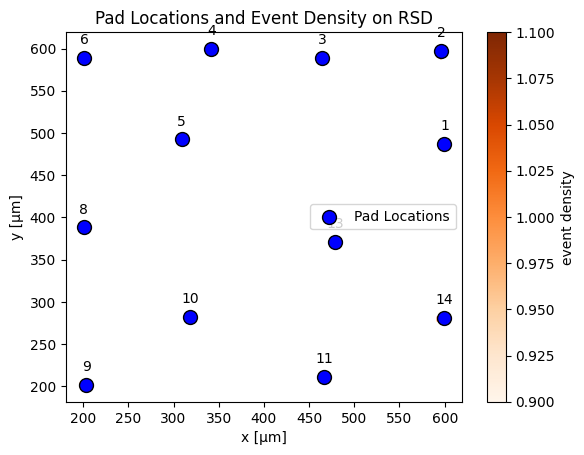

In [13]:
import matplotlib.pyplot as plt

# Extract the coordinates from the pads_location dictionary
x_coords, y_coords = zip(*pads_location.values())

# Create a figure and a subplot
fig, ax = plt.subplots()

# Hexbin plot to visualize the density of events
hb = ax.hexbin(x_coords, y_coords, gridsize=50, cmap='Oranges', mincnt=1)

# Add a color bar to the hexbin plot to indicate the scale of density
cb = fig.colorbar(hb, ax=ax)
cb.set_label('event density')

# Scatter plot to visualize the pad locations, with annotations
ax.scatter(x_coords, y_coords, color='blue', edgecolors='black', s=100, label='Pad Locations')
for pad, (x, y) in pads_location.items():
    ax.annotate(str(pad), (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Set plot labels and title
ax.set_xlabel('x [μm]')
ax.set_ylabel('y [μm]')
ax.set_title('Pad Locations and Event Density on RSD')
plt.grid(False)
plt.legend()
plt.show()


# Integrating Neighborhood Dynamics into Feature Engineering

In our refined approach, we've crafted new features that encapsulate the collective signal strength of each pad and its neighboring pads. For each event, we sum the 'pmax' values of a pad's neighbors, and count how many of them have a 'pmax' exceeding a specified significance threshold. Additionally, we introduce an average neighborhood signal feature to normalize the impact of varying neighborhood sizes. These innovative features aim to harness the contextual information inherent in the spatial distribution of signals, bolstering the predictive power of our model with insights drawn from the broader signal landscape.

In [14]:
# Define the neighborhood relationship between the pads
neighborhood_dict = {
    1: [2, 3, 13, 14],
    2: [1, 3],
    3: [1, 2, 4, 5, 13],
    4: [3, 5, 6],
    5: [3, 4, 6, 8, 10, 13],
    6: [4, 5, 8],
    8: [6, 5, 10, 9],
    9: [8, 10],
    10: [9, 8, 5, 13, 11],
    11: [10, 13, 14],
    13: [1, 3, 5, 10, 11, 14],
    14: [1, 13, 11]
}

# Define a threshold for significant 'pmax' value
significant_pmax_threshold = 5  # Example threshold value

# Add new features to the DataFrame for each pad
for pad, neighbors in neighborhood_dict.items():
    # Calculate the sum of 'pmax' values for the neighbors of each pad
    df[f'neighborhood_sum_pmax[{pad}]'] = df[[f'pmax[{n}]' for n in neighbors]].sum(axis=1)

    # Calculate the number of neighbors with 'pmax' above the threshold
    df[f'neighbors_above_threshold[{pad}]'] = df[[f'pmax[{n}]' for n in neighbors]].gt(significant_pmax_threshold).sum(axis=1)

# Optionally, normalize these new features by the number of neighbors to get an average
for pad, neighbors in neighborhood_dict.items():
    df[f'neighborhood_avg_pmax[{pad}]'] = df[f'neighborhood_sum_pmax[{pad}]'] / len(neighbors)

# Display the DataFrame with the new features
df.head()


,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],pmax[2],...,neighborhood_avg_pmax[3],neighborhood_avg_pmax[4],neighborhood_avg_pmax[5],neighborhood_avg_pmax[6],neighborhood_avg_pmax[8],neighborhood_avg_pmax[9],neighborhood_avg_pmax[10],neighborhood_avg_pmax[11],neighborhood_avg_pmax[13],neighborhood_avg_pmax[14]
0,200.0,200.0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,6.084506,...,6.632775,5.403657,14.647703,13.598862,38.457325,34.324823,31.031631,18.711716,13.276921,8.434165
1,200.0,200.0,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,4.507257,...,8.463471,6.246213,16.645641,14.240103,37.387760,33.243613,32.806443,23.654992,13.757874,11.737672
2,200.0,200.0,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,5.384155,...,5.716663,6.083180,14.230406,11.486318,36.862648,31.750359,28.204173,17.871258,12.083476,7.052370
3,200.0,200.0,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,4.165598,...,6.581261,6.457286,14.439777,13.954626,35.749350,32.194836,29.197429,17.560785,12.394258,8.123535
4,200.0,200.0,4.448146,-4.848743,3.997002,196.667482,1.101113,3.250262,-5.783587,4.736023,...,6.458550,7.931967,15.075081,13.615408,41.746076,33.731866,33.321511,18.469018,13.595480,8.642958


# Enhanced Spatial Feature Engineering: Highlighting Signal Interactions Among Sensor Pads

In our quest to capture the intricate spatial dynamics among sensor pads, we've implemented a binary representation scheme that marks the maximum signal pad with a high value, while also recognizing the influence of neighboring pads. This nuanced approach allows us to paint a detailed picture of each event's signal pattern, taking into account the collective behavior of pads in the vicinity of the peak signal. By doing so, we enhance the dataset with features that reflect the contextual interplay of signals, which is poised to significantly bolster the predictive acuity of our model.

In [15]:
# Define the function to apply our feature engineering logic
def create_spatial_features(df, pad, neighborhood_dict, threshold=19):
    # Create a binary feature for each pad
    for current_pad in df.columns:
        df[f'binary_signal_{current_pad}'] = 0  # Initialize with 0

    # Find the pad with the maximum 'pmax' for each event
    df['max_pmax_pad'] = df[[f'pmax[{i}]' for i in real_pads]].idxmax(axis=1)

    # Apply the logic to set values for each pad based on the max 'pmax' and its neighborhood
    for index, row in df.iterrows():
        max_pad = int(row['max_pmax_pad'].split('[')[-1].split(']')[0])  # Extract pad number
        df.at[index, f'binary_signal_pmax[{max_pad}]'] = 10  # Set 10 for the pad with max 'pmax'

        # Check and set values for neighboring pads
        for neighbor in neighborhood_dict[max_pad]:
            if row[f'pmax[{neighbor}]'] > threshold:
                df.at[index, f'binary_signal_pmax[{neighbor}]'] = 1  # Set 1 for significant neighbors

    return df

# Apply the function to the dataframe
df_enhanced = create_spatial_features(df_refined, real_pads, neighborhood_dict)


# Visualization

These visualizations highlight the primary pad with the maximum signal for a given event and its neighboring pads, depicted as triangles. The focus pad is marked in red, its neighbors in orange, and the rest in blue. Annotations further clarify the pad numbers, ensuring a clear understanding of each pad's role in the event's signal profile. This display not only provides a visual summary of the spatial feature engineering but also confirms the inter-pad relationships we've encoded into our dataset, with the triangular shapes offering a distinct visual representation of the sensor layout.

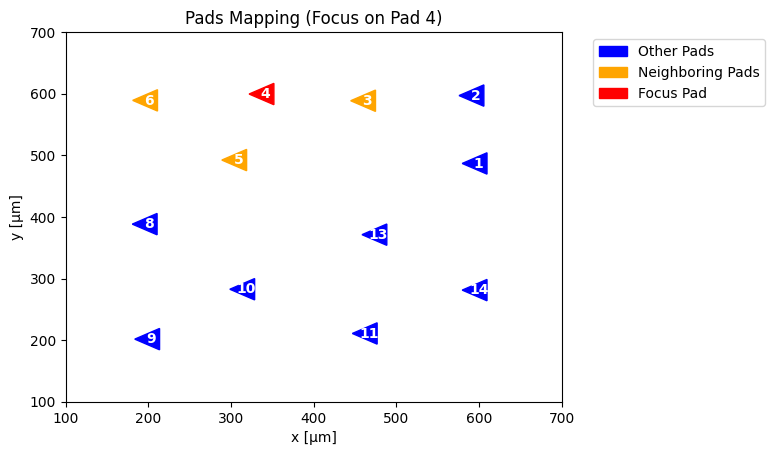

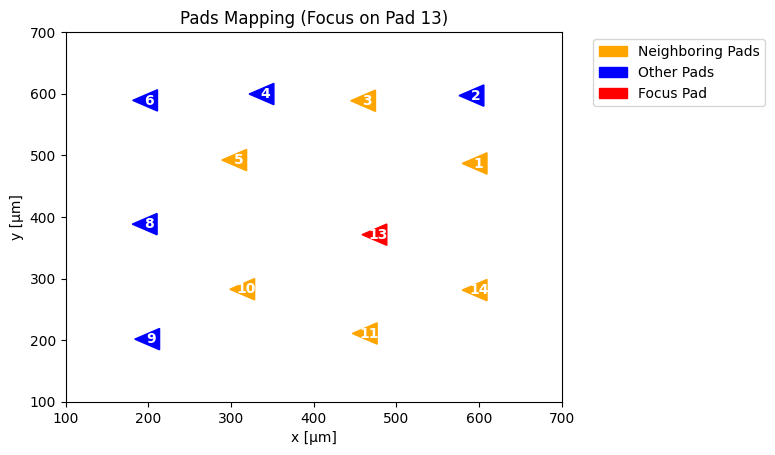

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_focused_pads(pads_location, neighborhood_dict, focus_pad, ax):
    used_labels = set()

    for pad, (x, y) in pads_location.items():
        if pad == focus_pad:
            label = 'Focus Pad' if 'Focus Pad' not in used_labels else None
            triangle = patches.RegularPolygon((x, y), numVertices=3, radius=20, orientation=np.pi/2, color='red', label=label)
            ax.add_patch(triangle)
            ax.annotate(str(pad), (x, y), color='white', weight='bold', fontsize=10, ha='center', va='center')
            used_labels.add('Focus Pad')
        elif pad in neighborhood_dict.get(focus_pad, []):
            label = 'Neighboring Pads' if 'Neighboring Pads' not in used_labels else None
            triangle = patches.RegularPolygon((x, y), numVertices=3, radius=20, orientation=np.pi/2, color='orange', label=label)
            ax.add_patch(triangle)
            ax.annotate(str(pad), (x, y), color='white', weight='bold', fontsize=10, ha='center', va='center')
            used_labels.add('Neighboring Pads')
        else:
            label = 'Other Pads' if 'Other Pads' not in used_labels else None
            triangle = patches.RegularPolygon((x, y), numVertices=3, radius=20, orientation=np.pi/2, color='blue', label=label)
            ax.add_patch(triangle)
            ax.annotate(str(pad), (x, y), color='white', weight='bold', fontsize=10, ha='center', va='center')
            used_labels.add('Other Pads')

    # Adding legends outside the plot
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot for pad 4
fig, ax = plt.subplots()
plot_focused_pads(pads_location, neighborhood_dict, 4, ax)
ax.set_title('Pads Mapping (Focus on Pad 4)')

# Plot for pad 13
fig, ax2 = plt.subplots()
plot_focused_pads(pads_location, neighborhood_dict, 13, ax2)
ax2.set_title('Pads Mapping (Focus on Pad 13)')

for ax in [ax, ax2]:
    ax.set_xlim([100, 700])
    ax.set_ylim([100, 700])
    ax.set_xlabel('x [μm]')
    ax.set_ylabel('y [μm]')

plt.show()


 # Define the pad localization function.
 This function calculates new feature columns based on the pad with the highest 'pmax' value and its neighbors.

In [17]:
def pad_localization(row, real_pads, neighborhood_dict):
    # Identify the pad with the highest 'pmax' value
    max_pad = max(real_pads, key=lambda pad: row[f'pmax[{pad}]'])

    # Initialize a list for the new feature columns
    feature_columns = [0] * len(real_pads)

    # Set value 10 for the maximum pad
    feature_columns[real_pads.index(max_pad)] = 10

    # Assign a value of 1 to the features corresponding to neighboring pads
    for neighbor_pad in neighborhood_dict.get(max_pad, []):
        if neighbor_pad in real_pads:
            feature_columns[real_pads.index(neighbor_pad)] = 1

    # Return the new features as a pandas Series with appropriate column names
    return pd.Series(feature_columns, index=[f'pad_{pad}' for pad in real_pads])


# Apply the feature engineering function to each row in the DataFrame.

In [18]:
# Apply the pad_localization to each row
new_columns = df_full_cleaned.apply(lambda row: pad_localization(row, real_pads, neighborhood_dict), axis=1)


# Ensure no duplicate columns are added.

In [19]:
# Rename new columns to avoid duplicates
new_columns.columns = [f"{col}_new" if col in df_full_cleaned.columns else col for col in new_columns.columns]


# Concatenate the newly created feature columns with the original DataFrame.

In [20]:
# Concatenate the new columns to the original dataframe
df_full_enhanced = pd.concat([df_full_cleaned, new_columns], axis=1)


# Check for duplicate columns and remove if necessary.

In [21]:
# Remove duplicate columns if they exist
df_full_enhanced = df_full_enhanced.loc[:, ~df_full_enhanced.columns.duplicated()]


# Display the first few rows of the updated DataFrame to verify the changes.

In [22]:
# Display the first few rows to verify the new features
df_full_enhanced.head()


,x,y,pmax[1],negpmax[1],area[1],tmax[1],rms[1],pmax[2],negpmax[2],area[2],...,pad_3,pad_4,pad_5,pad_6,pad_8,pad_9,pad_10,pad_11,pad_13,pad_14
0,200.0,200.0,5.409161,-17.721210,4.538778,22.600000,1.563902,6.084506,-19.892543,3.132328,...,0,0,0,0,1,10,1,0,0,0
1,200.0,200.0,4.414289,-4.736827,3.720435,111.875058,1.228058,4.507257,-3.787175,3.267461,...,0,0,0,0,1,10,1,0,0,0
2,200.0,200.0,4.567191,-5.985437,3.490490,107.800000,1.015408,5.384155,-3.948853,2.929150,...,0,0,0,0,1,10,1,0,0,0
3,200.0,200.0,5.019058,-4.229949,6.786200,175.600000,1.350620,4.165598,-5.576041,1.544370,...,0,0,0,0,1,10,1,0,0,0
4,200.0,200.0,3.250262,-5.783587,2.449456,159.800000,0.759515,4.736023,-5.137939,4.211047,...,0,0,0,0,1,10,1,0,0,0


# 4: Model Development

In this phase, we transition into the crucial stage of constructing and fine-tuning our predictive model. This step involves integrating the insights and features we've meticulously crafted in the previous stages to develop a robust model capable of accurately predicting the event locations.

# CatBoost and GridSearch

We're leveraging the power of CatBoost, a smart algorithm known for its accuracy in handling complex data, paired with GridSearch, a method that helps find the best settings for our model. This combination is like having a skilled chef (CatBoost) with the perfect recipe (GridSearch) to make our predictions as precise as possible. It's our way of ensuring we get the most accurate results from our data, without getting lost in the technical maze.








# Data Preparation:

In [23]:
# Dropping the target variables 'x' and 'y' from the dataset to create feature set 'X'
X = df_full_cleaned.drop(['x', 'y'], axis=1).values

# Extracting the target variables 'x' and 'y' to create the target set 'y'
y = df_full_cleaned[['x','y']].values


# Splitting the Dataset: Creating Training and Testing Sets

In [24]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 # Target Variables: Preparing for Dual Predictions

In [25]:
y_train_x = y_train[:,0]
y_train_y = y_train[:,1]

y_test_x = y_test[:,0]
y_test_y = y_test[:,1]

# Setting Up CatBoost Regressor

In [26]:
catboost = CatBoostRegressor(loss_function='RMSE', random_seed=42, verbose=0)

 # Euclidean Distance Calculation

In [27]:
def euclidean_distance(y_true, y_pred):
    # Extract the x-coordinates from the true and predicted values
    xx_test = y_true[:, 0]
    yy_test = y_true[:, 1]

    # Extract the y-coordinates from the true and predicted values
    xx_pred = y_pred[:, 0]
    yy_pred = y_pred[:, 1]

    # Determine the number of data points
    n = y_true.shape[0]

    # Calculate the sum of squared differences in x and y coordinates
    numerator = np.sqrt(np.sum((xx_test - xx_pred)**2 + (yy_test - yy_pred)**2))

    # Normalize the distance by the number of data points
    return numerator / n


# Tuning the CatBoost Model with GridSearch

In this crucial step, we focus on fine-tuning our CatBoost model to ensure it performs at its best. This process involves using GridSearchCV, a powerful tool that systematically experiments with a combination of different hyperparameters to find the most effective settings for our model.

In [28]:
# Defining the range of parameters for GridSearch
param_grid = {
    'learning_rate': [0.15, 0.2, 0.25],  # Learning rates to test
    'depth': [8],                        # Tree depth to test
    'iterations': [1300, 1500]           # Number of iterations to test
}

# Setting up GridSearchCV with the CatBoostRegressor
# 'cv=5' implies using 5-fold cross-validation
# 'error_score='raise'' ensures that any errors during the process are raised, not ignored
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=5, verbose=0, error_score='raise')

# Fitting GridSearch to the training data
grid_search.fit(X_train, y_train_x)


GridSearchCV(cv=5, error_score='raise',
             estimator=<catboost.core.CatBoostRegressor object at 0x7b276bd770a0>,
             param_grid={'depth': [8], 'iterations': [1300, 1500],
                         'learning_rate': [0.15, 0.2, 0.25]})

# Extracting Optimal Hyperparameters from GridSearch

In [29]:
# Retrieving the best hyperparameters from the GridSearch
best_params_grid = grid_search.best_params_

# Display the best hyperparameters
best_params_grid


{'depth': 8, 'iterations': 1500, 'learning_rate': 0.2}

# Utilizing the Best Model for Predictions

In [30]:
# Retrieving the best model from GridSearchCV
best_model_grid = grid_search.best_estimator_

# Making predictions using the best model on the test dataset
y_pred_x = best_model_grid.predict(X_test)


# Finalizing Predictions for Y Coordinates

In [31]:
# Fitting the best model from GridSearchCV with the training data for 'y' coordinates
best_model_grid.fit(X_train, y_train_y)

# Making predictions for the 'y' coordinates using the best model
y_pred_y = best_model_grid.predict(X_test)


# Compiling Predictions into a DataFrame

In [32]:
y_pred = pd.DataFrame({'x': y_pred_x, 'y': y_pred_y})

# Evaluating Model Accuracy with Euclidean Distance

In [33]:
score_grid = euclidean_distance(y_test, y_pred.values)
print(f"Euclidean Distance {score_grid}")

Euclidean Distance 0.0183616009859448


# Visualization


# Histogram of Euclidean Distances for Model Predictions:
This plot displays the frequency distribution of Euclidean distances between the model's predicted coordinates and the actual (true) coordinates. A concentration of distances near zero indicates higher model accuracy in predicting particle interaction locations within the Resistive Silicon Detector (RSD).

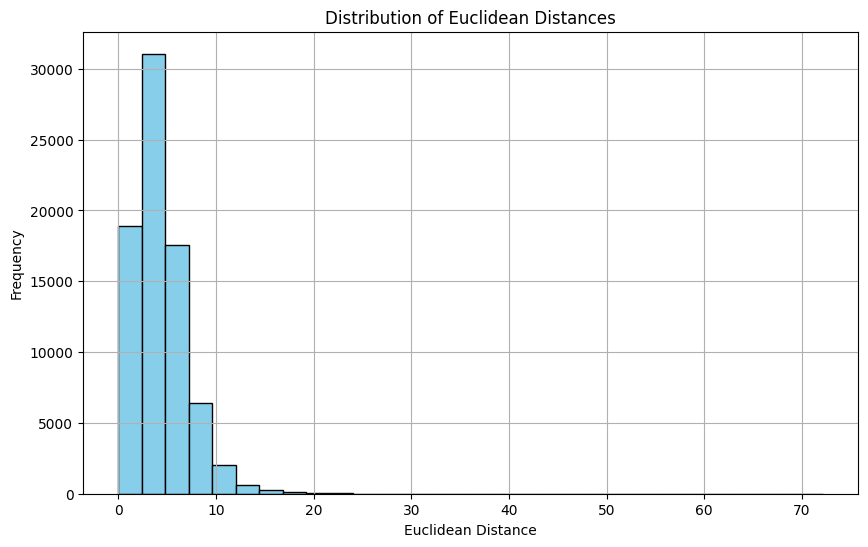

In [34]:
# Plotting the histogram of Euclidean distances
euclidean_distances = np.sqrt(np.sum((y_test - y_pred.values)**2, axis=1))

plt.figure(figsize=(10, 6))
plt.hist(euclidean_distances, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Euclidean Distances')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Comparison of True and Predicted Particle Interaction Coordinates:

This scatter plot contrasts the true (actual) coordinates of particle interactions with those predicted by the model. Points closer together indicate a higher accuracy of the model. Blue dots represent the true values, and red dots represent the predicted values, providing a visual assessment of the model's localization performance.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


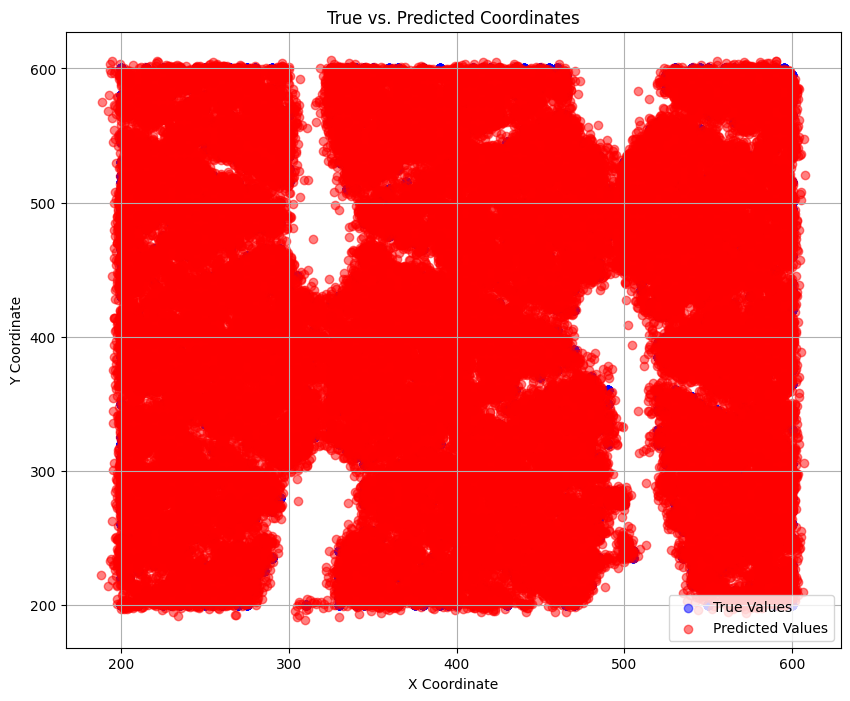

In [35]:
# Scatter plot of true vs. predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Values', alpha=0.5)
plt.scatter(y_pred['x'], y_pred['y'], c='red', label='Predicted Values', alpha=0.5)
plt.title('True vs. Predicted Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

# 5: Model Evaluation Phase

In this stage, we focus on evaluating our trained model using a new dataset. This step is crucial to assess how well our model generalizes to unseen data, a key aspect of its practical applicability.

# Loading the Evaluation Dataset:

In [36]:
# Load the evaluation dataset
evaluation_event = '/content/drive/MyDrive/DSL_2024/evaluation.csv'
df_eval = pd.read_csv(evaluation_event)

# Identifying noisy features and dropping them

In [37]:
# Noisy Features

noisy_pads = [0, 7, 12, 16, 17]
signal_attributes = ['pmax', 'negpmax', 'area', 'tmax', 'rms']
features_to_remove = [f"{attribute}[{pad}]" for pad in noisy_pads for attribute in signal_attributes]
df_cleaned_eval = df_eval.drop(columns=features_to_remove)


# Apply pad_localization to create new features

In [38]:
# Creating New Features

X_eval = df_cleaned_eval.drop(['Id'], axis=1)
id_eval = df_cleaned_eval['Id']
new_columns = X_eval.apply(lambda row: pad_localization(row, real_pads, neighborhood_dict), axis=1)
X_eval = pd.concat([X_eval, new_columns], axis=1)


# Predicting with the best model from GridSearch

In [39]:
# Predicting the best model

best_model_grid.fit(X, y[:,0])
y_eval_x = best_model_grid.predict(X_eval)
best_model_grid.fit(X, y[:,1])
y_eval_y = best_model_grid.predict(X_eval)


# Creating the final DataFrame and generating the final CSV file

In [40]:
from google.colab import files

# Generating the final CSV file
df_final = pd.DataFrame({'Id': id_eval, 'Predicted': [f'{x}|{y}' for x, y in zip(y_eval_x, y_eval_y)]})

# Setting the filename for the CSV file
csv_file_name = 'final_submission_2024_DSL.csv'

# Saving the DataFrame to a CSV file
df_final.to_csv(csv_file_name, index=False, encoding='utf-8')

#  downloading  the CSV file
files.download(csv_file_name)

print(f"Predictions saved and ready for download: {csv_file_name}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predictions saved and ready for download: final_submission_2024_DSL.csv
